In [8]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# Load kennels in json-format
with open("kennels.txt") as k:
    kennels_and_doggos = json.loads(k.read())

# eval -> evaluate string to python code if possible
with open("registration.txt") as r:
    registration = eval(r.read())

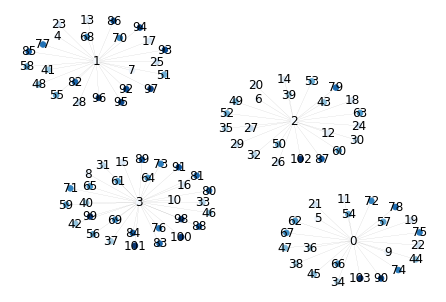

In [9]:
# Create graph
graph = nx.Graph()

# Creating nodes with indexes as these will be used for edges
for idx, ken_dog in enumerate(kennels_and_doggos):
    graph.add_node(idx, name=ken_dog["name"])

graph.add_edges_from(registration)

# Draw graph - could not get "name" attribute as labels
nx.draw(
    graph,
    pos=graphviz_layout(graph),
    node_size=30,
    width=0.05,
    cmap=plt.cm.Blues,
    with_labels=True,
    node_color=range(len(graph)),
)

In [10]:
# Returns a tuple with format(id_of_node, no_of_edges)
max_edges = max(dict(graph.degree()).items(), key=lambda x: x[1])

# Most dogs registered
most_dogs = kennels_and_doggos[max_edges[0]]

# List of dogs in Nanner's kennel
edges = graph.edges(max_edges)

for e in edges:
    print(kennels_and_doggos[e[1]])

{'name': 'BUSTER', 'breed': 'German Shepherd'}
{'name': 'BALDER', 'breed': 'Beagle'}
{'name': 'BUSTER', 'breed': 'German Shepherd'}
{'name': 'CHARLIE', 'breed': 'German Shepherd'}
{'name': 'MAX', 'breed': 'French Bulldog'}
{'name': 'BELLA', 'breed': 'Yorkshire Terrier'}
{'name': 'MAX', 'breed': 'German Shorthaired Pointer'}
{'name': 'MOLLY', 'breed': 'Golden Retriever'}
{'name': 'MILLE', 'breed': 'Bulldog'}
{'name': 'BELLA', 'breed': 'German Shorthaired Pointer'}
{'name': 'BELLA', 'breed': 'German Shorthaired Pointer'}
{'name': 'MOLLY', 'breed': 'Beagle'}
{'name': 'BUSTER', 'breed': 'Rottweiler'}
{'name': 'MOLLY', 'breed': 'Beagle'}
{'name': 'MOLLY', 'breed': 'Labrador Retriever'}
{'name': 'MILLE', 'breed': 'Yorkshire Terrier'}
{'name': 'MOLLY', 'breed': 'German Shorthaired Pointer'}
{'name': 'LUNA', 'breed': 'Rottweiler'}
{'name': 'CHARLIE', 'breed': 'German Shepherd'}
{'name': 'MILLE', 'breed': 'Rottweiler'}
{'name': 'BELLA', 'breed': 'Beagle'}
{'name': 'MILLE', 'breed': 'Bulldog'}
{

In [11]:
def find_breed_description(breed):
    # Setup for use of selenium
    url = "https://www.petfinder.com/dog-breeds/"
    browser = webdriver.Firefox()
    browser.get(url)
    browser.implicitly_wait(3)

    # Start webscraping
    search_field = browser.find_element_by_id("breedAutoSuggest-autosuggestTextInput")
    search_field.send_keys(breed)

    """
    browser.implicitly_wait(3)
    link_to_breed = browser.find_element_by_link_text(breed)
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    browser.implicitly_wait(5)
    -- Cannot click link -> error = cannot be scrolled into view --
    link_to_breed.click()
    """

    # Dirty hack for making the rest of the assignment
    breed_link = url + breed.replace(" ", "-")
    browser.get(breed_link)
    desc = browser.find_element_by_class_name("txt.m-txt_lg.u-vr6x").text
    return desc


b = find_breed_description("Labrador retriever")
b

'The Labrador is a moderate dog, not extreme in any way. It is square or slightly longer than tall, of fairly large bone and substance. The breed’s broad head and strong jaws enabled the dog to carry the largest game birds, such as Canada geese. A heavy body and strong legs enable the dog to swim and run powerfully. The coat, which is short, straight, and dense with a soft undercoat, is weatherproof and helps to protect it from icy waters. The Lab is a working retriever and possesses style without over-refinement, and substance without clumsiness.'